In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


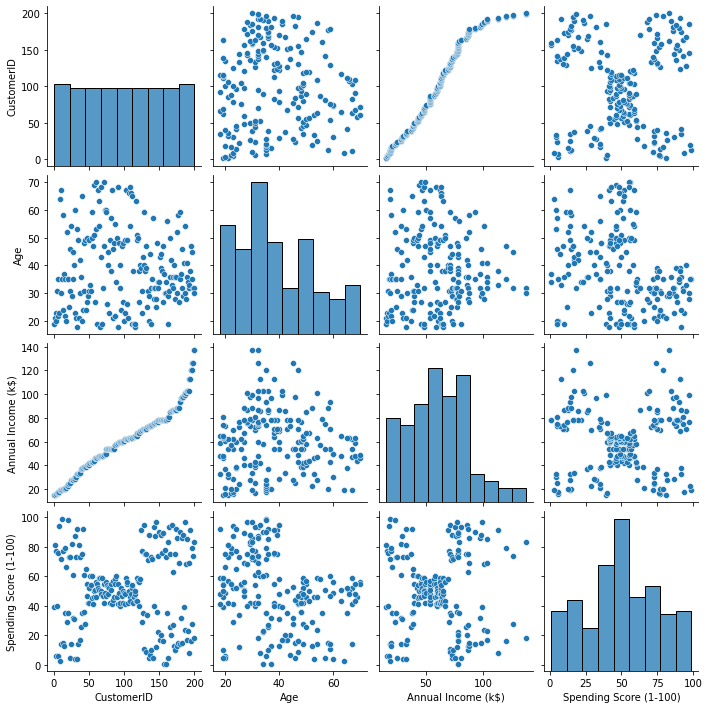

In [5]:
sns.pairplot(data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

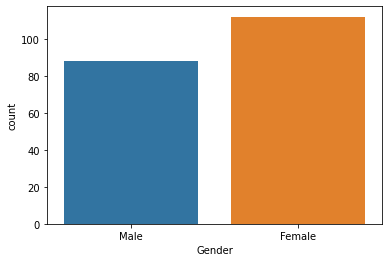

In [6]:
sns.countplot(x='Gender',data=data)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

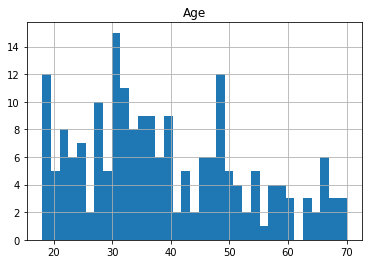

In [7]:
data.hist('Age',bins=35)

(array([11., 13., 23., 15., 10., 12., 13.,  6.,  3.,  6.]),
 array([18., 23., 28., 33., 38., 43., 48., 53., 58., 63., 68.]),
 <BarContainer object of 10 artists>)

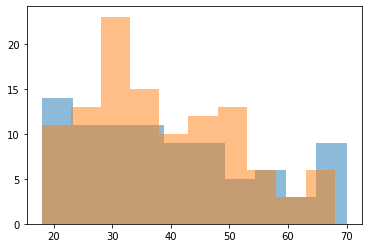

In [8]:
plt.hist('Age',data=data[data['Gender']=='Male'],alpha=0.5,label='Male')
plt.hist('Age',data=data[data['Gender']=='Female'],alpha=0.5,label='Female')

array([[<AxesSubplot:title={'center':'Annual Income (k$)'}>]],
      dtype=object)

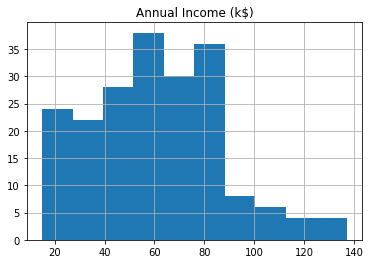

In [9]:
data.hist('Annual Income (k$)')

In [10]:
male_customer=data[data['Gender']=='Male']
female_customer=data[data['Gender']=='Female']
                      
print(male_customer['Spending Score (1-100)'].mean()) 
print(female_customer['Spending Score (1-100)'].mean())          

48.51136363636363
51.526785714285715


<AxesSubplot:>

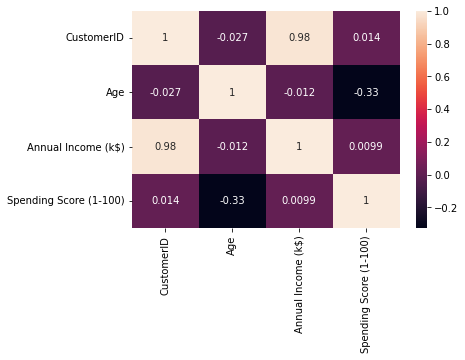

In [11]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

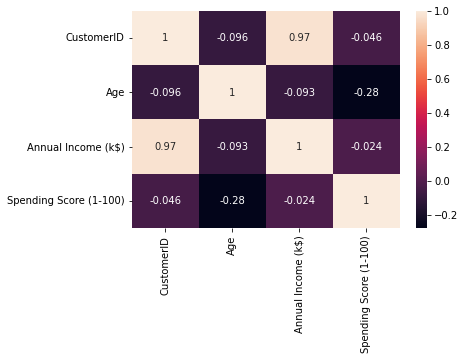

In [12]:
sns.heatmap(male_customer.corr(),annot=True)

<AxesSubplot:>

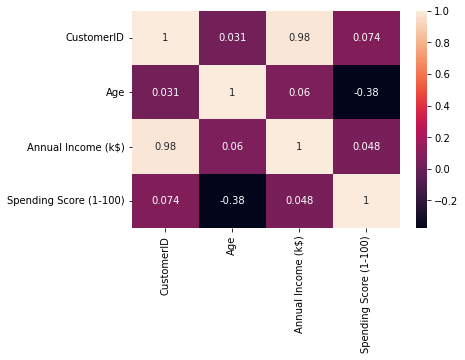

In [13]:
sns.heatmap(female_customer.corr(),annot=True)

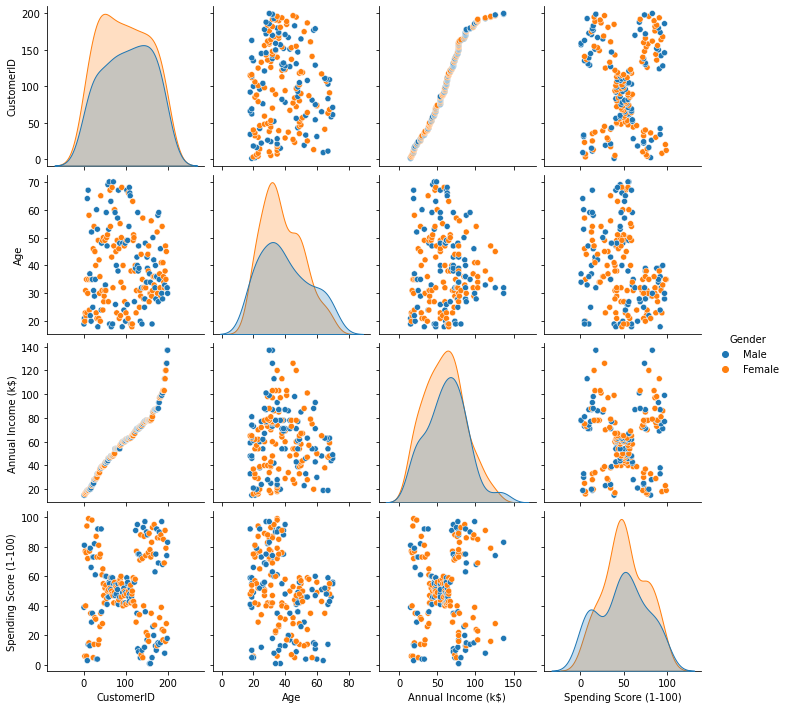

In [14]:
sns.pairplot(data,hue='Gender')

In [15]:
from sklearn.cluster import KMeans

In [16]:
new_data=data.iloc[:,3:]
new_data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [17]:
model=KMeans(n_clusters=5)
df_pred=model.fit_predict(new_data[['Annual Income (k$)','Spending Score (1-100)']])
df_pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [18]:
new_data['cluster']=df_pred
new_data

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,4
197,126,74,1
198,137,18,4


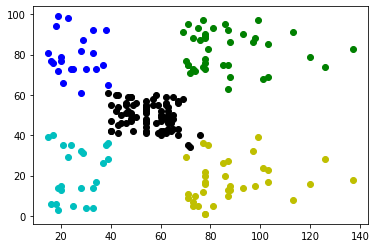

In [19]:
df1=new_data[new_data['cluster']==0]
df2=new_data[new_data['cluster']==1]
df3=new_data[new_data['cluster']==2]
df4=new_data[new_data['cluster']==3]
df5=new_data[new_data['cluster']==4]


plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='k')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='g')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='b')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='c')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='y')
